# Importing Libraries

In [41]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import math
import numpy
import matplotlib.pyplot as plt
import pandas
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error as mse

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.preprocessing import PolynomialFeatures

from sklearn.tree import DecisionTreeRegressor

from sklearn.neural_network import MLPRegressor

from sklearn.ensemble import RandomForestRegressor

# Reading the dataset

In [42]:
openFiles=pd.read_csv("Consumo_cerveja.csv")
openFiles.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [43]:
openFiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
Data                           365 non-null object
Temperatura Media (C)          365 non-null object
Temperatura Minima (C)         365 non-null object
Temperatura Maxima (C)         365 non-null object
Precipitacao (mm)              365 non-null object
Final de Semana                365 non-null float64
Consumo de cerveja (litros)    365 non-null float64
dtypes: float64(2), object(5)
memory usage: 51.5+ KB


In [44]:
openFiles["Precipitacao (mm)"] = openFiles["Precipitacao (mm)"].str.replace(",",".").astype(float)
openFiles["Temperatura Media (C)"] = openFiles["Temperatura Media (C)"].str.replace(",",".").astype(float)
openFiles["Temperatura Minima (C)"] = openFiles["Temperatura Minima (C)"].str.replace(",",".").astype(float)
openFiles["Temperatura Maxima (C)"] = openFiles["Temperatura Maxima (C)"].str.replace(",",".").astype(float)

In [45]:
openFiles['Data'] = pd.to_datetime(openFiles['Data'])
openFiles['year'] = openFiles['Data'].dt.year
openFiles['month'] = openFiles['Data'].dt.month
openFiles['day'] = openFiles['Data'].dt.day

In [46]:
openFiles.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),year,month,day
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461,2015.0,1.0,1.0
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972,2015.0,1.0,2.0
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814,2015.0,1.0,3.0
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,2015.0,1.0,4.0
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900,2015.0,1.0,5.0


In [47]:
openFiles=openFiles.drop(['Data'],axis=1)

In [48]:
total = openFiles.isnull().sum().sort_values(ascending=False)
percent_1 = openFiles.isnull().sum()/openFiles.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
day,576,61.2
month,576,61.2
year,576,61.2
Consumo de cerveja (litros),576,61.2
Final de Semana,576,61.2
Precipitacao (mm),576,61.2
Temperatura Maxima (C),576,61.2
Temperatura Minima (C),576,61.2
Temperatura Media (C),576,61.2


In [49]:
total = openFiles.isnull().sum().sort_values(ascending=False)
percent_1 = openFiles.isnull().sum()/openFiles.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
day,576,61.2
month,576,61.2
year,576,61.2
Consumo de cerveja (litros),576,61.2
Final de Semana,576,61.2
Precipitacao (mm),576,61.2
Temperatura Maxima (C),576,61.2
Temperatura Minima (C),576,61.2
Temperatura Media (C),576,61.2


### Normalization
- Making all columns value between 0 to 1 by using MinMaxScaler Normalization method
- Intuition for normalization
  - **value**=$\frac{Max(Column)-value}{Max(Column)-Min(Column)}$

# Preprocessing of data 

In [50]:
#removing nan rows
openFiles=openFiles.dropna(how='all')
        
#Normalization        
minmax = MinMaxScaler()
openFiles[[i for i in list(openFiles.columns)[0:6]]] = minmax.fit_transform(openFiles[[i for i in list(openFiles.columns)[0:6]]])

In [51]:
openFiles.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),year,month,day
0,0.902256,0.956835,0.818182,0.000000,0.0,0.471221,2015.0,1.0,1.0
1,0.884712,1.000000,0.863636,0.000000,0.0,0.620031,2015.0,1.0,2.0
2,0.746867,0.848921,0.700000,0.000000,1.0,0.698101,2015.0,1.0,3.0
3,0.694236,0.784173,0.640909,0.012658,1.0,0.655082,2015.0,1.0,4.0
4,0.684211,0.748201,0.627273,0.000000,0.0,0.616979,2015.0,1.0,5.0


# Train-Test split

In [52]:
y = openFiles['Consumo de cerveja (litros)']
x = openFiles.drop(['Consumo de cerveja (litros)'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Linear Regression

In [13]:
linearRegressor = LinearRegression()
linearRegressor.fit(X_train, y_train)
y_pred = linearRegressor.predict(X_test)

In [14]:
print("mean squared error is: ",mse(y_test,y_pred))
errors = abs(y_pred-y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))
print('R2 score is: ',r2_score(y_test, y_pred))
print('median absolute error is: ',median_absolute_error(y_test, y_pred))
print('Accuracy is: ', linearRegressor.score(X_test,y_test)*100)

mean squared error is:  0.010325622415473907
Mean Absolute Error: 0.08
R2 score is:  0.7406013522605532
median absolute error is:  0.07931199940365208
Accuracy is:  74.06013522605531


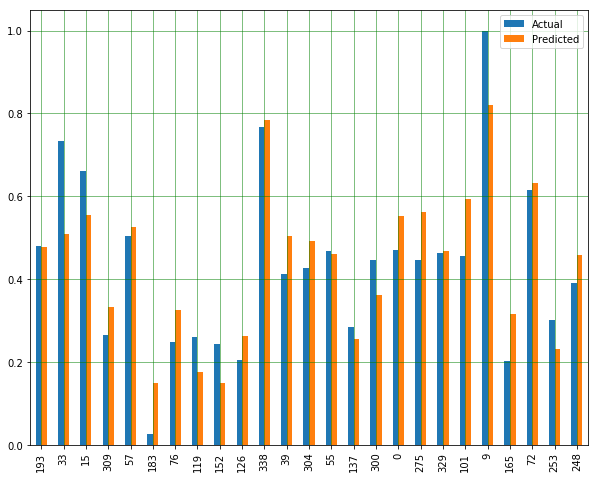

In [15]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Ridge Regularization

In [16]:
rr = Ridge(alpha=0.01) 
rr.fit(X_train, y_train)
y_pred=rr.predict(X_test)
print("mean squared error is: ",mse(y_test,y_pred))
errors = abs(y_pred-y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))
print('R2 score is: ',r2_score(y_test, y_pred))
print('median absolute error is: ',median_absolute_error(y_test, y_pred))
print('Accuracy is: ', rr.score(X_test,y_test)*100)

mean squared error is:  0.010333585799742794
Mean Absolute Error: 0.08
R2 score is:  0.7404012973846668
median absolute error is:  0.0791421415000782
Accuracy is:  74.04012973846667


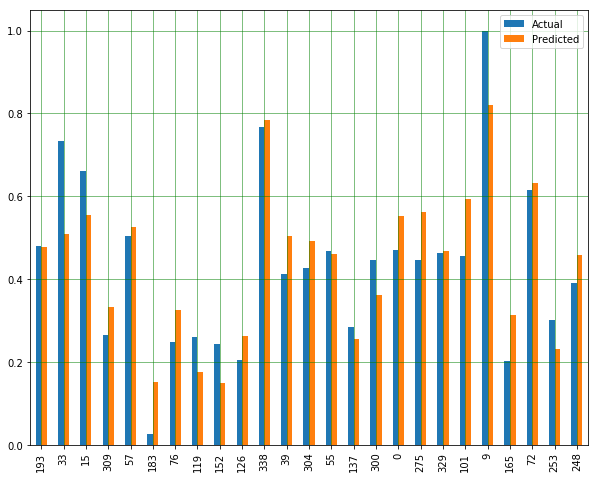

In [17]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [18]:
rr100 = Ridge(alpha=100) 
rr100.fit(X_train, y_train)
y_pred = rr100.predict(X_test)
print("mean squared error is: ",mse(y_test,y_pred))
errors = abs(y_pred-y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))
print('R2 score is: ',r2_score(y_test, y_pred))
print('median absolute error is: ',median_absolute_error(y_test, y_pred))
print('Accuracy is: ', rr100.score(X_test,y_test)*100)

mean squared error is:  0.029138046793820732
Mean Absolute Error: 0.14
R2 score is:  0.2679986123878694
median absolute error is:  0.11648753390599265
Accuracy is:  26.79986123878694


In [19]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

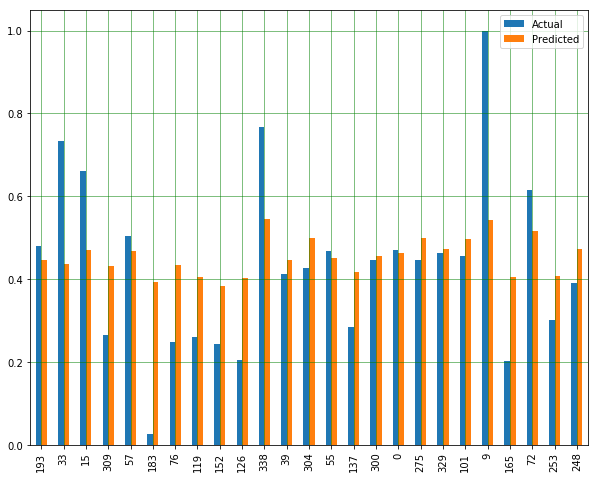

In [20]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Lasso Regularization

In [21]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
y_pred=lasso001.predict(X_test)
print("mean squared error is: ",mse(y_test,y_pred))
errors = abs(y_pred-y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))
print('R2 score is: ',r2_score(y_test, y_pred))
print('median absolute error is: ',median_absolute_error(y_test, y_pred))
print('Accuracy is: ', lasso001.score(X_test,y_test)*100)

mean squared error is:  0.01624786726864733
Mean Absolute Error: 0.1
R2 score is:  0.591823656865367
median absolute error is:  0.09122679763655006
Accuracy is:  59.1823656865367


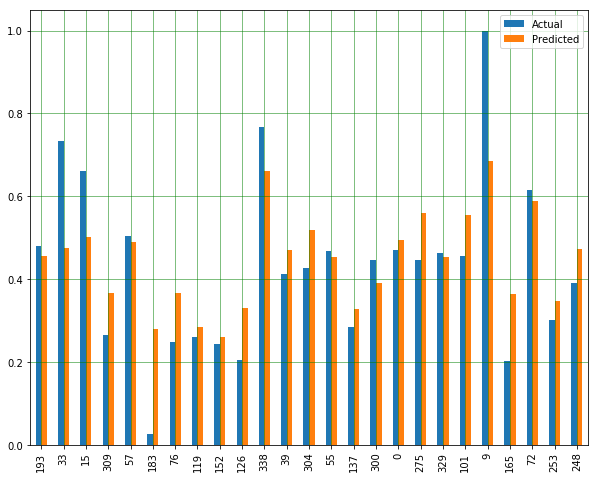

In [22]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [23]:
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
y_pred=lasso00001.predict(X_test)
print("mean squared error is: ",mse(y_test,y_pred))
errors = abs(y_pred-y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))
print('R2 score is: ',r2_score(y_test, y_pred))
print('median absolute error is: ',median_absolute_error(y_test, y_pred))
print('Accuracy is: ', lasso00001.score(X_test,y_test)*100)

mean squared error is:  0.010382751232434408
Mean Absolute Error: 0.08
R2 score is:  0.7391661711866937
median absolute error is:  0.07923649273444677
Accuracy is:  73.91661711866938


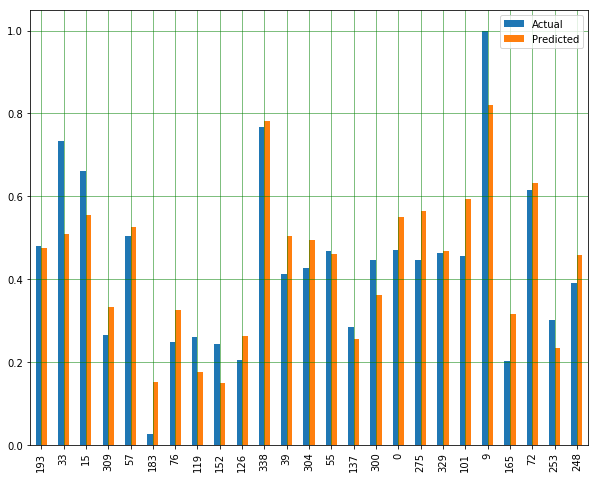

In [24]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Polynomial Regression


In [25]:
poly=PolynomialFeatures(degree=11)
poly_x=poly.fit_transform(x)
regressor=LinearRegression()
regressor.fit(poly_x,y)
y_pred=regressor.predict(poly.fit_transform(X_test))
print("mean squared error is: ",mse(y_test,y_pred))
errors = abs(y_pred-y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))
print('R2 score is: ',r2_score(y_test, y_pred))
print('median absolute error is: ',median_absolute_error(y_test, y_pred))

mean squared error is:  0.0020137485597636943
Mean Absolute Error: 0.04
R2 score is:  0.9494109282451438
median absolute error is:  0.033245291357839823


In [26]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

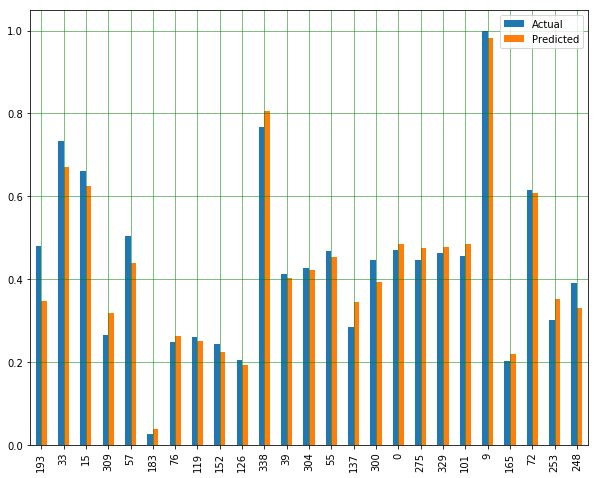

In [27]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#  CART Decision Tree

In [28]:
regressor = DecisionTreeRegressor(max_leaf_nodes = 15, min_samples_leaf =7, max_depth=10)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [29]:
regressor = DecisionTreeRegressor(max_leaf_nodes = 15, min_samples_leaf =7, max_depth=10)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print("mean squared error is: ",mse(y_test,y_pred))
errors = abs(y_pred-y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))
print('R2 score is: ',r2_score(y_test, y_pred))
print('median absolute error is: ',median_absolute_error(y_test, y_pred))
print('Accuracy is: ', regressor.score(X_test,y_test)*100)

mean squared error is:  0.01477777274917687
Mean Absolute Error: 0.1
R2 score is:  0.6287551380929135
median absolute error is:  0.0905978306938755
Accuracy is:  62.87551380929135


In [30]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

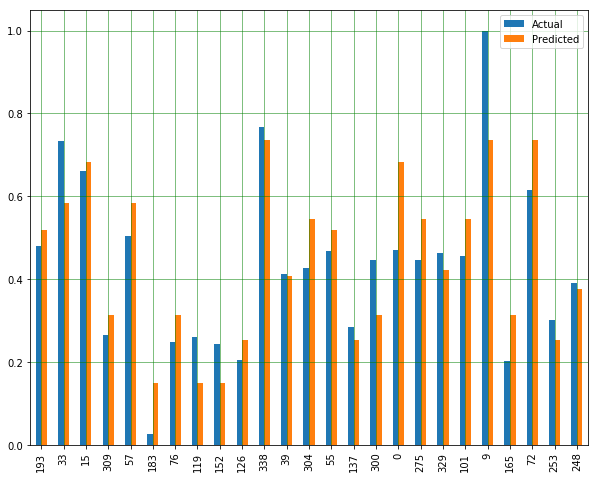

In [31]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [32]:
regressor = DecisionTreeRegressor(max_leaf_nodes = 16, min_samples_leaf =10, max_depth=10)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [33]:
print("mean squared error is: ",mse(y_test,y_pred))
errors = abs(y_pred-y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))
print('R2 score is: ',r2_score(y_test, y_pred))
print('median absolute error is: ',median_absolute_error(y_test, y_pred))
print('Accuracy is: ', regressor.score(X_test,y_test)*100)

mean squared error is:  0.014891535937994431
Mean Absolute Error: 0.1
R2 score is:  0.6258971973166192
median absolute error is:  0.0905978306938755
Accuracy is:  62.589719731661916


In [34]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

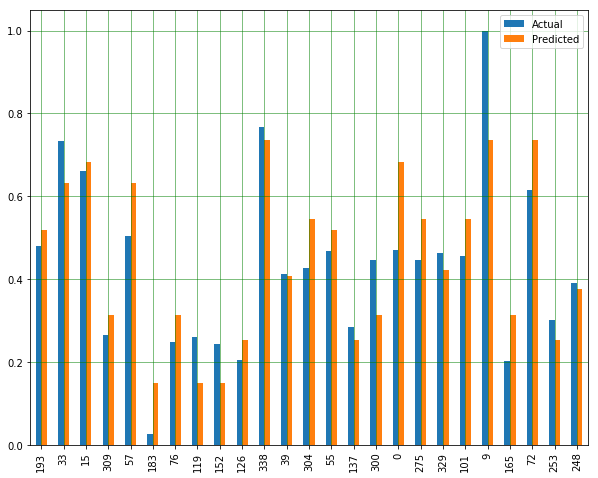

In [35]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Random Forest

In [36]:
clf = RandomForestRegressor(n_estimators=100, max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("mean squared error is: ",mse(y_test,y_pred))
errors = abs(y_pred-y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))
print('R2 score is: ',r2_score(y_test, y_pred))
print('median absolute error is: ',median_absolute_error(y_test, y_pred))
print('Accuracy is: ', clf.score(X_test,y_test)*100)

mean squared error is:  0.014752598682400093
Mean Absolute Error: 0.1
R2 score is:  0.629387557003585
median absolute error is:  0.07694932766098073
Accuracy is:  62.9387557003585


In [37]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

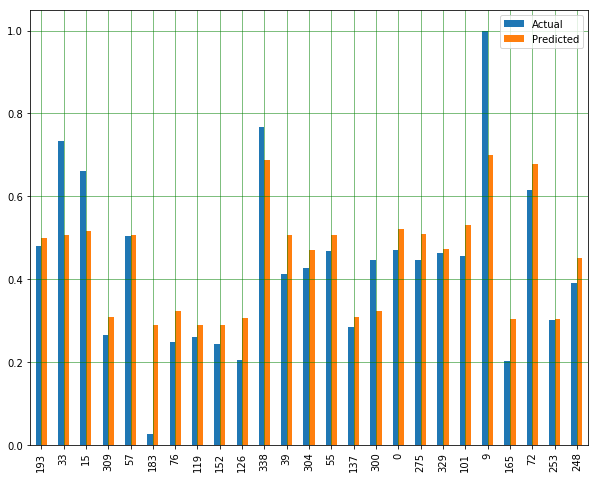

In [38]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Neural Network

In [39]:
clf = MLPRegressor(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("mean squared error is: ",mse(y_test,y_pred))
errors = abs(y_pred-y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))
print('R2 score is: ',r2_score(y_test, y_pred))
print('median absolute error is: ',median_absolute_error(y_test, y_pred))

mean squared error is:  0.0421457742525845
Mean Absolute Error: 0.17
R2 score is:  -0.058779452623500594
median absolute error is:  0.14516881468576948


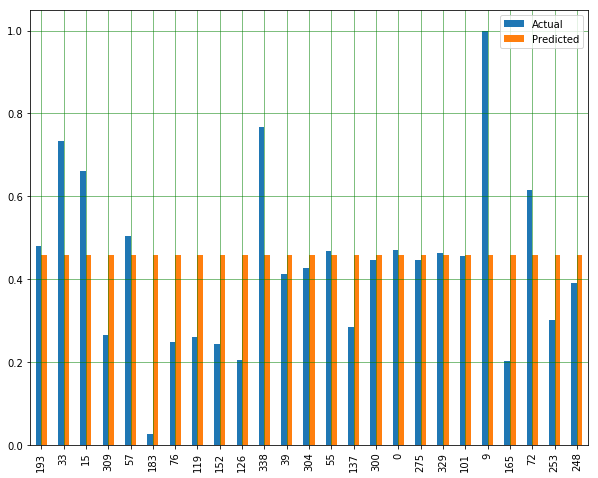

In [40]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()